<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Les-données" data-toc-modified-id="Les-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Les données</a></span></li><li><span><a href="#Premier-travail-sur-un-nombre-réduit-de-features" data-toc-modified-id="Premier-travail-sur-un-nombre-réduit-de-features-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Premier travail sur un nombre réduit de features</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Choix-des-hyper-paramètres" data-toc-modified-id="Choix-des-hyper-paramètres-2.0.2.1"><span class="toc-item-num">2.0.2.1&nbsp;&nbsp;</span>Choix des hyper-paramètres</a></span></li><li><span><a href="#Courbe-Lift" data-toc-modified-id="Courbe-Lift-2.0.2.2"><span class="toc-item-num">2.0.2.2&nbsp;&nbsp;</span>Courbe Lift</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Modèle-complet" data-toc-modified-id="Modèle-complet-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modèle complet</a></span></li><li><span><a href="#Gradient-Boosting-Decision-Trees" data-toc-modified-id="Gradient-Boosting-Decision-Trees-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient Boosting Decision Trees</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></div>

<font color="red" size=3.4> 
    Ce notebook a été réalisé par P. Bianchi et K. Elgui, Télécom ParisTech. Son usage est privé ne doit pas dépasser le cadre du cours "IA317 Large scale machine learning". En particulier, nous vous demandons de ne pas rendre
    de code accessible via github ou autre moyen de partage.
    </font> 

<font color="red">
Effectuer les imports nécessaires (numpy, pandas, etc.) ou le faire au fil de vos besoins.
</font>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings 
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Les données
La signification des features est fournie ici https://www.kaggle.com/c/avazu-ctr-prediction/data  
<font color="red">
Charger les données dans une dataframe et visualiser les premières lignes.</font>

In [5]:
%%time
df = pd.read_csv('../data/train.csv')

Wall time: 2min 31s


In [ ]:
df.head()

<font color="red">
Quelle est la fréquence des 'clicks' dans la base de donnée ? </font>

In [7]:
df['click'].mean()

0.16980562476404604

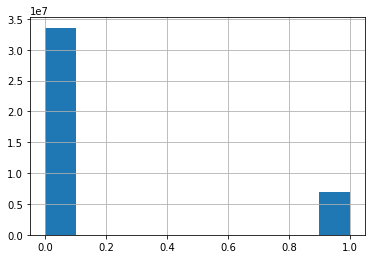

In [8]:
df['click'].hist()

On est donc en présence d'un jeu de données déséquilibré. La classe des 'clics' constitue moins d'un cinquième de toute la base de données. On sait d'emblée qu'un classifieur prédisant toujours 'non-clic' aura d'assez bonnes performances en termes de taux d'erreur (de l'ordre de 0.17). La courbe ROC ou le lift seront de meilleures métriques de performance.
<p>
<font color="red">
Quelles sont les features catégorielles ? Combien de valeurs distinctes prennent-elles chacune ?</font>

In [9]:
print(df.nunique())

MemoryError: 

<font color="red">
Si on devait procéder à un encodage en dummies de toutes les variables catégorielles, quelle serait la dimension du modèle ?
</font>

<font color="red">
Analyser la colonne 'hour' : quel est le format utilisé ? Comment peut on transformer/simplifier cette feature ?</font>

<font color="red">
Tester le script suivant.</font>

In [ ]:
def datesplit(originalDate):
    originalDate = str(originalDate)
    year = int(originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    return datetime.datetime(year,month,day,hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour  

<font color="red">
Avec la méthode "apply", créer une colonne 'weekday' pour le jour de la semaine, et remplacer la colonne 'hour' par l'heure.</font>

<font color="red">
Avec la méthode "groupby", visualiser l'influence de l'heure et du jour sur les clicks.</font>

Commencer par comprendre les features ayant peu de modalités : 
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">
Inspecter par exemple les colonnes 'C15' (dimension de l'annonce) et 'site_category' : visualiser la moyenne des clics.</font>

<font color="red">
Certaines catégories de site ont un taux de click nul. Pourquoi ? Vérifier en affichant le count de chaque modalité.</font>

Il est pratique visualiser les deux colonnes conjointement :

In [ ]:
col = 'C15'
a = pd.DataFrame([df.groupby(col)['click'].mean(),df.groupby(col)['click'].count()]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count',ascending=False)

<font color="red">
Diviser le jeu de données en un train et un test set</font>

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = 

# Premier travail sur un nombre réduit de features
<p>
<font color="red">
Dans une nouvelle dataframe X1, extraire les colonnes : 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [ ]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 
                'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

<font color="red"> Créer deux nouvelles matrices Xtrain_oh et Xtest_oh contenant les données de train et de test, transformées en dummies à l'aide du onehot-encoder de sklearn.

Quel est le type de Xtrain_oh ?
</font>

In [ ]:
from sklearn.preprocessing import OneHotEncoder


<font color="red">
Quel est le nouveau nombre de colonnes ?</font>

<font color="red">
Visualiser la première ligne de la matrice de design obtenue (la convertir en numpy.array avec la méthode .toarray())</font>

<font color="red">
Fitter un modèle de régression logistique aux données d'apprentissage.</font>

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


<font color="red">
À l'aide des méthodes predict et predict_proba, afficher les décisions dures et les décisions douces obtenues sur les données de test.</font>

In [ ]:
hard = 
soft = 

<font color="red">
Evaluer la probabilité d'erreur et commenter (on pourra comparer cette erreur avec celle d'un classifieur identiquement nul).</font>

<font color="red">
Afficher la courbe ROC et l'aire sous la courbe ROC. Calculer la log-loss</font>

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, log_loss


### Random Forest

Nous renvoyons à l'aide sklearn http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Dans un premier temps, nous proposons de fitter le RFClassifier par défaut de sklearn. 
Dans la suite, nous allons chercher à optimiser ses hyperparamètres afin de gagner en performance.
 
<font color="red">
Entrainer un RF-classifier sur le modèle restreint. Utiliser dans un premier temps des arbres profonds en fixant le nombre d'exemples par feuilles à 1.
    
On pourra fixer le paramètres n_jobs à -1 pour paralléliser la construction de la forêt. On évaluera également avec %%time le temps de calcul.
</font> 

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

<font color="red">Afficher les hyperparamètres utilisés par votre random forest (utiliser "print").</font>

<font color="red">Calculer la valeur de l'aire sous la courbe ROC et la log-loss.</font>

<font color="red">Entrainer un RF-classifieur en limitant cette fois la profondeur des arbres. Par exemple, on pourra fixer le nombre minimal d'exemples par feuille à 20.

Afficher l'AUC et la log-loss</font>

<font color="red">Expliquer l'influence de la profondeur des arbres.
<br>
Tracer les courbes ROC pour chaque modèle.</font>

#### Choix des hyper-paramètres
Nous vous proposons d'utiliser la librairie hyperopt (https://conference.scipy.org/proceedings/scipy2013/pdfs/bergstra_hyperopt.pdf) pour optimiser les hyper-paramètres de Random Forest. Vous avez aussi la possibilité de lancer, par exemple, une recherche exhaustive sur une grille à l'aide de la méthode sklearn sklearn.model_selection.GridSearchCV. 
<font color="red">
- Pour des raisons de temps de calcul, nous n'optimiserons ici que le paramètre "min_samples_leaf". Sur quels autres paramètres aurait-on pu lancer l'optimisation?
<br>
- Compléter le code ci-dessous afin d'évaluer le meilleur hyperparamètre en termes de log-loss.
</font>

In [ ]:
%%time
import hyperopt
from hyperopt import fmin, tpe, rand, hp, Trials, STATUS_OK

space = {
    #'test_size': hp.uniform('test_size', .1, .9),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 50, 1),
}

df_result_hyperopt = pd.DataFrame(
    columns=['loss', 'estimators'] + list(space.keys()))

i = 0
Xt, Xv, yt, yv = \
train_test_split(Xtrain_oh, ytrain, test_size=.3, random_state=42)

def objective(space):
    global i
    i += 1
    clf = RandomForestClassifier(max_depth=space['min_samples_leaf'], n_jobs=-1)
    clf.fit(Xt, yt)
    loss = log_loss(yv, clf.predict_proba(Xv)[:,1])
    print("\r iteration: {} \t {}  >>> LOSS: {}".format(i, space, loss))
    df_result_hyperopt.loc[i, ['loss',  'estimators'] + list(space.keys())] = \
        [loss,  clf] + list(space.values())
    return {'loss': loss, 'status': STATUS_OK}

trials = Trials()

best = fmin(fn=objective, space=space, algo=tpe.suggest,
            max_evals=10, trials=trials)


<font color="red">Afficher la courbe des log-loss obtenues en fonction de l'hyper-paramètre. A-t-on exploré tous les points de la grille ?</font>

Facultatif : Si le temps le permet, on pourra comparer hyperopt avec la méthode GridSearchCV de sklearn (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [ ]:
#%%time
#from sklearn.model_selection import GridSearchCV
#parameters = {'min_samples_leaf': np.arange(2, 50)}
#clf = RandomForestClassifier(n_jobs=-1)
#rfc_gs = GridSearchCV(clf, parameters)
#rfc_gs.fit(Xt, yt)

#### Courbe Lift

Une autre façon de visualiser le résultat de la classification est le lift.  
Chaque seuil possible permet d'isoler un segment de la population testée (ceux qui ont une probabilité de survie supérieure au seuil). Le lift de ce segment est le rapport entre le taux de survie calculé sur ce segment, et le taux de survie global.

<font color="red">
Importer la fonction plot_lift de utils.py, et afficher la courbe de lift.  
Quel est le lift du premier quart de la population identifié par le test ?</font>

In [ ]:
from utils import plotlift


On obtient un lift égal à un peu moins de deux pour environ 20% de la population (~1.75). C'est à dire qu'on a identifié un segment de la population pour lequel la probabilité de clic est (environ) deux fois supérieure à la population globale.

# Modèle complet
On considère l'exemple de la colonne 'site_id'
<br>
<font color="red">
- Calculer pour chaque modalité, le nombre d'occurrence dans la base de données et la moyenne des clics pour cette modalité.  
- Avec sns.jointplot, représenter l'ensemble des points (count,mean) de chaque modalité.</font>


In [ ]:
col = 'which column'
a = pd.concat((df.groupby(col)['click'].mean(), df.groupby(col)['click'].count()), axis=1)
a.colaumns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'],alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

Plusieurs sites ayant de fortes occurrences dans la base de donnée ont des fréquences de clics très différentes de la moyenne. Il est pertinent de conserver de la colonne 'site_id' au moins les modalités ayant le plus de count.  

<font color="red">
Effectuer le même travail avec la colonne 'device_id'. Que remarquez vous ? A quoi pourrait correspondre le point isolé ?</font>

In [ ]:
col = 'which column'
a = pd.concat((df.groupby(col)['click'].mean(), df.groupby(col)['click'].count()), axis=1)
a.columns = ['mean', 'n_val']
thres = 1000
sns.jointplot(a['n_val'],a['mean'],alpha=0.25);
sns.jointplot(a[a['n_val']<thres]['n_val'],a[a['n_val']<thres]['mean'],alpha=0.25);

<font color="red">
Dans la colonne df['device_id'], repérer la valeur V correspondant au plus grand nombre count. Créer une nouvelle colonne df['user'] définie de la manière suivante :</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{si device_id = V}\\ \text{device_id} & \text{sinon.}\end{array}\right.
$$

<font color="red">
On pourra visualiser de même la similarité entre site_id et site_domain, et fusionner ces deux colonnes.</font>

<font color="red">
Effectuons à nouveau le partage train/test à partir de la dataframe df ainsi modifiée 
(test_size = 0.1, random_state = 100)
</font>

<font color="red">
    Définir un OneHotEncoder.  
Fitter transformer la base de train</font>

<font color="red">
Transformer la base de test.  
Si une erreur survient, analyser cette erreur et la résoudre en modifiant le paramètre "handle_unknown" du OneHotEncoder.
</font>

<font color="red">
Quel est le nombre de features ?</font>

Le vecteur "n_ones" ci-dessous fournit le nombre de "un" dans chaque colonne de la matrice de train Xtrain_oh.
<br>
<font color="red">
Combien de modalités ont elles été vues plus de 100 fois ? 
</font>

La liste 'cols_to_keep' ci-dessous permet de conserver les indices des modalités vues plus de cent fois.
<font color="red">
(Noter l'usage de la fonction enumerate)
</font>

<font color="red">En se restreignant aux colonnes de 'cols_to_keep', réentrainer le modèle de régression logistique et comparer les performances.</font>

# Gradient Boosting Decision Trees  
<font color="red">
Importer GradientBoostingClassifier de scikit learn. 
Evaluer les performances, en utilisant une cinquantaine d'estimateurs. Pour comparer :  
- On entrainera le classifieur sur les même colonnes "cols_to_keep" que celles de la régression logistique ;  
- On choisira le learning_rate de manière adequate. </font>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


<font color="red">
Que fournit l'appel de gb.estimators_ ?
</font>

On cherche désormais à utiliser le classifieur gb pour générer des features utilisables par la régression logistique.
<font color="red">
Avec la méthode gb.apply du classifieur, générer une transformation leafs_train de la base de train Xtrain_oh[:,cols_to_keep] dont la colonne n correspond au numéro de feuille retourné par l'estimateur n
</font>

<font color="red">
Effectuer l'encodage en dummies de ces nouvelles features.</font>

<font color="red">
Avec la fonction hstack, créer une nouvelle matrice de features en concaténant horizontalement les nouvelles features ainsi créées, et les features précédemment utilisées pour la régression logistique. </font>

In [ ]:
from scipy.sparse import csr_matrix, hstack


<font color="red">
Effectuer une régression logistique sur les nouvelles features.</font>

# XGBoost
<br>
<font color="red">
Importer XGBClassifier du package xgboost.  
Entrainer le classifieur avec le même nombre d'estimateur et le même learning rate que précédemment, et en fixant le paramètre n_jobs=-1.  
Comparer le résultat avec le GradientBoosting de scikit learn (risque et temps de calcul)
</font>

In [ ]:
import xgboost
from xgboost import XGBClassifier

<font color="red">
Augmenter le nombre d'estimateurs et visualiser l'impact sur les performances (on sera aussi amené à agir sur le learning rate)</font>